<a href="https://colab.research.google.com/github/bydecom/cifar10/blob/main/Cifar10_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils

Import Dataset CIFAR-10

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


Standardized Dataset

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Build model

In [5]:
model = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [11]:
model.fit(train_images, train_labels, epochs=10)
# Lưu mô hình
model.save('cifar10_model.h5')

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.5127 - accuracy: 0.8186
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.4807 - accuracy: 0.8289
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.4500 - accuracy: 0.8403
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.4239 - accuracy: 0.8506
Epoch 5/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.3975 - accuracy: 0.8589
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.3687 - accuracy: 0.8699
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.3493 - accuracy: 0.8755
Epoch 8/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.3238 - accuracy: 0.8835
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.3036 - accuracy: 0.8920
Epoch 10/10
1563/1563 [==============================] - 60s 38m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluate model

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nĐộ chính xác:', test_acc)

313/313 - 3s - loss: 1.4497 - accuracy: 0.6747 - 3s/epoch - 10ms/step

Độ chính xác: 0.6747000217437744


In [10]:
import numpy as np
# Đếm số lượng mẫu trong mỗi lớp
unique, counts = np.unique(test_labels, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Số lượng mẫu trong mỗi lớp trong tập huấn luyện:")
print(class_counts)

Số lượng mẫu trong mỗi lớp trong tập huấn luyện:
{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


Saving chim.png to chim (3).png
1/1 [==============================] - 0s 70ms/step


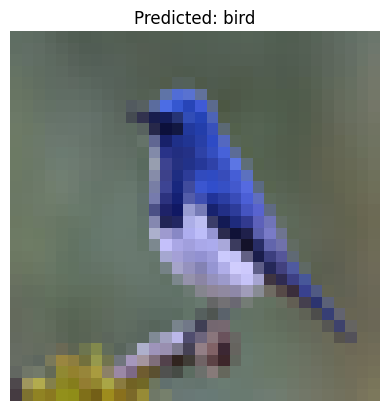

In [17]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Load the saved model
model = load_model('cifar10_model.h5')

# Upload the image file
uploaded = files.upload()

# Iterate through the uploaded files
for filename in uploaded.keys():
    # Read the image file
    img = Image.open(filename)
    img = img.convert('RGB')
    # Resize the image to match the input shape of the model
    img = img.resize((32, 32))
    # Convert image to numpy array
    img_array = np.asarray(img)
    # Normalize the image data
    img_array = img_array / 255.0
    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Perform prediction
    prediction = model.predict(img_array)
    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Define class labels
    class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Display the image and predicted class
    plt.imshow(img)
    plt.axis('off')
    plt.title("Predicted: " + class_labels[predicted_class])
    plt.show()
